In [43]:
from data import MNIST
from mmdew_adapter import MMDEWAdapter
from mmdew.mmd import MMD

In [44]:
from sklearn import preprocessing
import numpy as np
def preprocess(x):
    return preprocessing.minmax_scale(x)
mnist = MNIST(preprocess=preprocess)

In [45]:

cps = mnist._change_points
true_cps = [i for i, x in enumerate(cps) if x]
fst_cps = true_cps[0]
snd_cps = true_cps[1]
fst_cps
print(true_cps)

[6824, 13814, 20639, 27780, 34683, 41559, 47872, 55165, 63042]


In [46]:
cps[0]

False

In [47]:


mymmd=MMD(biased=True)


mmd_nys = MMDEWAdapter(1, alpha=1e-16)
pre_train_data = np.array(
                [mnist.next_sample()[0] for _ in range(100)]
            ).squeeze(1)
mmd_nys.pre_train(data=pre_train_data)
mnist.restart()

In [48]:
import pandas as pd
x = []
y = []
for i in range(snd_cps +1):
    mmdcalc = "undefined"
    #print(i)
    next_sample, _, is_change = mnist.next_sample()
    mmd_nys.add_element(next_sample)
    if i > fst_cps:
        split = 1
        ucap_sum = 0
        bucket_index = 0
        finished = False
        while bucket_index  < len(mmd_nys.detector.buckets) and not finished:
            #print("hello")
            ucap_sum += mmd_nys.detector.buckets[bucket_index].uncompressed_capacity
            print("bucket index:", bucket_index)
            print("ucap sum:", ucap_sum)
            if ucap_sum <= fst_cps:

                split = bucket_index + 1
                bucket_index += 1
            else:
                finished = True
        bsstring = ""
        for j in range(0, len(mmd_nys.detector.buckets)):
            bsstring += "(" + str(mmd_nys.detector.buckets[j].uncompressed_capacity) + " " + str(len(mmd_nys.detector.buckets[j].weights)) + ")"
        print(split)
        print(len(mmd_nys.detector.buckets))
        print("element sum", ucap_sum)
        mmdcalc = "undefined"
        if len(mmd_nys.detector.buckets) > 1:
            mmdcalc = str(mmd_nys.detector.mmd(split))
        print(f"elements read: {i+1}, current bs stream length: {len(mmd_nys.detector.buckets)} stream: {bsstring} mmd between pre and post: {mmdcalc} with a split at: {split}")

    else:
        print(f"elements read: {i+1}")
    x.append(i)
    if mmdcalc == "undefined":
        y.append(float("NaN"))
    else:

        y.append(mmdcalc)

elements read: 1
elements read: 2
elements read: 3
elements read: 4
elements read: 5
elements read: 6
elements read: 7
elements read: 8
elements read: 9
elements read: 10
elements read: 11
elements read: 12
elements read: 13
elements read: 14
elements read: 15
elements read: 16
elements read: 17
elements read: 18
elements read: 19
elements read: 20
elements read: 21
elements read: 22
elements read: 23
elements read: 24
elements read: 25
elements read: 26
elements read: 27
elements read: 28
elements read: 29
elements read: 30
elements read: 31
elements read: 32
elements read: 33
elements read: 34
elements read: 35
elements read: 36
elements read: 37
elements read: 38
elements read: 39
elements read: 40
elements read: 41
elements read: 42
elements read: 43
elements read: 44
elements read: 45
elements read: 46
elements read: 47
elements read: 48
elements read: 49
elements read: 50
elements read: 51
elements read: 52
elements read: 53
elements read: 54
elements read: 55
elements read: 56
e

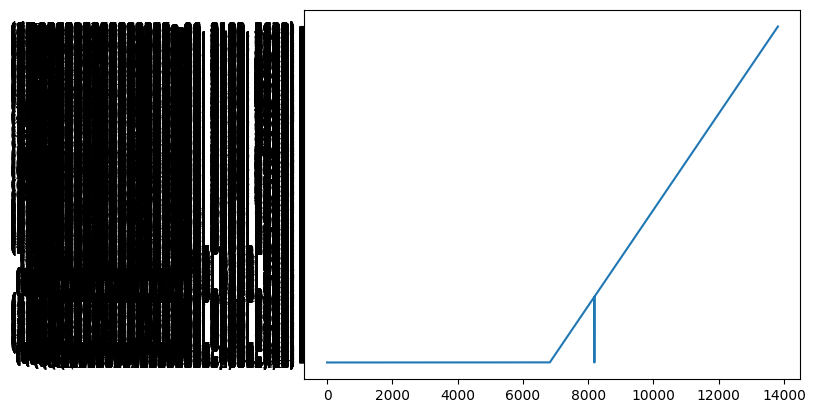

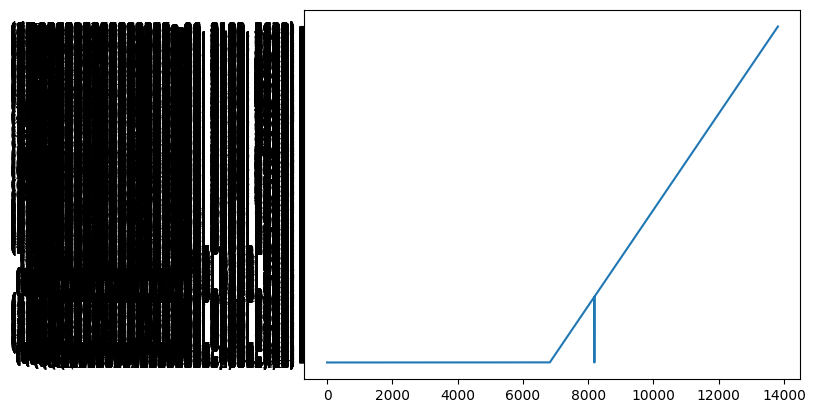

In [51]:
import matplotlib.pyplot as plt

x_np = np.array(x)
y_np = np.array(y)

plt.plot(x_np,y_np)
plt.show()

In [54]:
print(y_np[100:])



['nan' 'nan' 'nan' ... '(3.107596965553069e-06, 8192, 5621)'
 '(3.1383687513894367e-06, 8192, 5622)'
 '(3.169118496340591e-06, 8192, 5623)']
